In [1]:
from pathlib import Path
import zipfile
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
import plotly.express as px
sklearn.set_config(display="diagram")

np.random.seed(42)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# def load_data():
#     tarball_path = Path("datasets/dataset.csv.gz")
#     if not tarball_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/CK-ssos/data_mining_assignment/blob/0770dada480776bc67841f8d0c2fa594560114eb/dataset.csv.gz"
#         urllib.request.urlretrieve(url, tarball_path)
#         with tarfile.open(tarball_path) as dataset_tarball:
#             dataset_tarball.extractall(path="datasets")
#     return pd.read_csv(Path("datasets/dataset.csv"))

# def load_data():
#     zip_file_path = Path("datasets/dataset.zip")
#     if not zip_file_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/CK-ssos/data_mining_assignment/blob/8aa4cc8249b3a2bd0f402ca2c1e6c19fbb08f1bb/dataset.zip"
#         urllib.request.urlretrieve(url, zip_file_path)

#     with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
#         zip_file.extractall(path="datasets")

#     return pd.read_csv(Path("datasets/dataset.csv"))

def load_data():
  return pd.read_csv(Path("dataset.csv"))

#Load the data set
data = load_data()


In [2]:
data.head()

ID  travel_fee             departure_time  departure_long  departure_lat  arrival_long  arrival_lat  occupancy
0  2013-07-02 19:54:00.000000232         7.0  2013-07-02 19:54:00+00:00      -74.005360      40.728867    -74.008913    40.710907          1
1    2013-09-28 00:21:31.0000002         5.5  2013-09-28 00:21:31+00:00      -74.014165      40.708941    -74.016310    40.716734          1
2  2013-06-16 03:18:00.000000150        21.5  2013-06-16 03:18:00+00:00      -73.991075      40.760352    -73.941382    40.713292          1
3  2013-07-20 13:43:00.000000121         9.5  2013-07-20 13:43:00+00:00      -74.002662      40.723630    -73.991722    40.748905          5
4    2013-11-05 22:57:17.0000003        15.5  2013-11-05 22:57:17+00:00      -73.962397      40.712705    -73.996834    40.680403          2

In [3]:
data.describe()

travel_fee  departure_long  departure_lat  arrival_long   arrival_lat     occupancy
count  2.596558e+06    2.596558e+06   2.596558e+06  2.596514e+06  2.596514e+06  2.596558e+06
mean   1.259551e+01   -7.243741e+01   3.974318e+01 -7.239685e+01  3.972336e+01  1.709320e+00
std    1.081654e+01    1.125115e+01   9.133454e+00  1.143503e+01  8.438912e+00  1.375425e+00
min   -5.200000e+01   -7.400217e+02  -3.124490e+03 -1.216417e+03 -3.111707e+03  0.000000e+00
25%    6.500000e+00   -7.399220e+01   4.073442e+01 -7.399147e+01  4.073352e+01  1.000000e+00
50%    9.500000e+00   -7.398186e+01   4.075236e+01 -7.398023e+01  4.075279e+01  1.000000e+00
75%    1.400000e+01   -7.396680e+01   4.076704e+01 -7.396362e+01  4.076779e+01  2.000000e+00
max    5.000000e+02    8.343336e+01   2.342817e+03  1.428740e+03  4.739714e+02  9.000000e+00

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596558 entries, 0 to 2596557
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              object 
 1   travel_fee      float64
 2   departure_time  object 
 3   departure_long  float64
 4   departure_lat   float64
 5   arrival_long    float64
 6   arrival_lat     float64
 7   occupancy       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 158.5+ MB


In [5]:
#to find the missing value percentage
missingVal = data.isnull().sum() * 100 / len(data)
missingVal_df = pd.DataFrame({'count': data.count(),
                              'data type': data.dtypes,
                                 'percent_missing': missingVal})
missingVal_df

count data type  percent_missing
ID              2596558    object         0.000000
travel_fee      2596558   float64         0.000000
departure_time  2596558    object         0.000000
departure_long  2596558   float64         0.000000
departure_lat   2596558   float64         0.000000
arrival_long    2596514   float64         0.001695
arrival_lat     2596514   float64         0.001695
occupancy       2596558     int64         0.000000

Text(0.5, 1.0, 'Total count of occupancy in each trip')

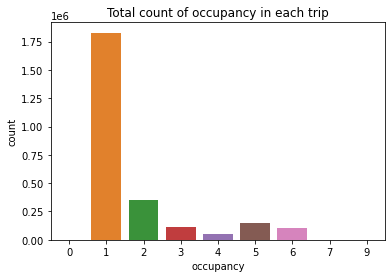

In [6]:
x=(data['occupancy'].value_counts())
p = sb.countplot(data=data, x="occupancy")
plt.title('Total count of occupancy in each trip')

In [7]:
print('Count of Occupancy per trips')
data['occupancy'].value_counts()

Count of Occupancy per trips


1    1828996
2     352307
5     150316
3     109306
6     101480
4      54084
0         66
9          2
7          1
Name: occupancy, dtype: int64

Text(0.5, 1.0, 'Travel Fee')

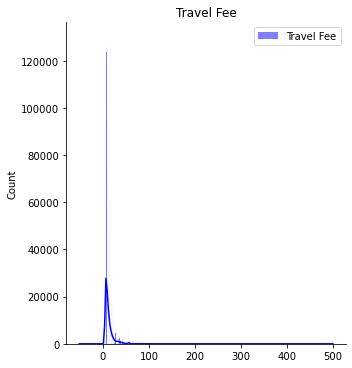

In [8]:
sb.displot(data['travel_fee'].values, color = 'blue', label = 'Travel Fee', kde = True)
plt.legend()
plt.title('Travel Fee')

In [9]:
df = pd.DataFrame(data)
total_fare_by_occupancy = df.groupby('occupancy')['travel_fee'].sum()
print("The total fare by each occupancy")
print(total_fare_by_occupancy)

The total fare by each occupancy
occupancy
0        1797.32
1    22706206.93
2     4696000.27
3     1408284.99
4      709918.48
5     1907718.62
6     1274983.80
7          25.00
9          25.50
Name: travel_fee, dtype: float64


In [10]:
# df['departure_time'] = pd.to_datetime(df['departure_time'])
# df['hour'] = df['departure_time'].dt.hour+1
# average_fare_by_time = df.groupby('hour')['travel_fee'].mean()
# average_fare_by_time

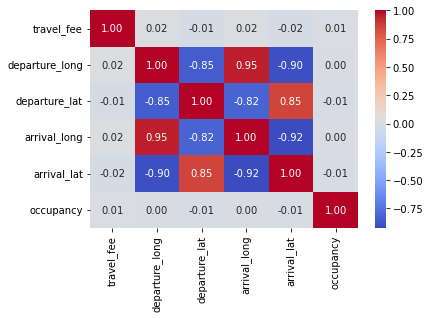

In [11]:
correlation_matrix = data.corr()
sb.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt=".2f")
plt.show()

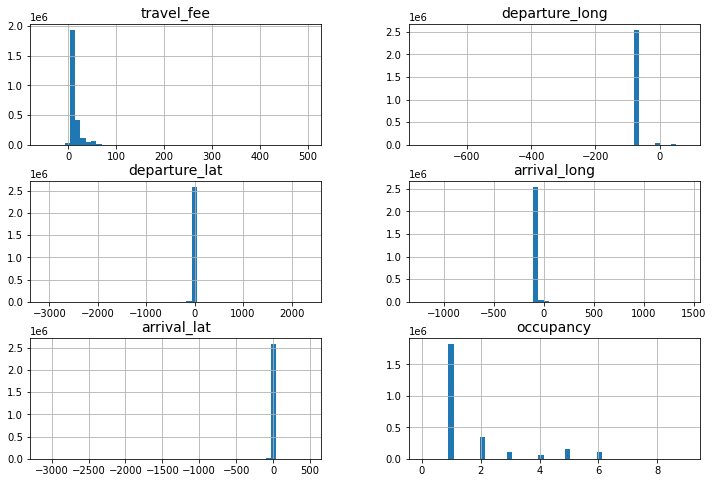

In [12]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

In [13]:
data.isna().sum()

ID                 0
travel_fee         0
departure_time     0
departure_long     0
departure_lat      0
arrival_long      44
arrival_lat       44
occupancy          0
dtype: int64

In [14]:
data.eq(0).sum()

ID                    0
travel_fee           53
departure_time        0
departure_long    41393
departure_lat     41169
arrival_long      42810
arrival_lat       42616
occupancy            66
dtype: int64

In [15]:
cat_att = ['ID']
num_att = ['travel_fee','departure_time','departure_lang','departure_lat','arrival_long','arrival_lat','occupancy']


In [16]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(data, test_size=0.20, random_state=42)

print("Length of train_set:", len(train))
print("Length of test_set:", len(test))

Length of train_set: 2077246
Length of test_set: 519312


In [17]:
print("\nSummary statistics:")
print(train.describe())


Summary statistics:
         travel_fee  departure_long  departure_lat  arrival_long   arrival_lat     occupancy
count  2.077246e+06    2.077246e+06   2.077246e+06  2.077210e+06  2.077210e+06  2.077246e+06
mean   1.259864e+01   -7.244034e+01   3.974384e+01 -7.240165e+01  3.972529e+01  1.709356e+00
std    1.082452e+01    1.124968e+01   9.363192e+00  1.138653e+01  8.495177e+00  1.375457e+00
min   -5.200000e+01   -7.400217e+02  -3.124490e+03 -1.216417e+03 -3.111707e+03  0.000000e+00
25%    6.500000e+00   -7.399219e+01   4.073443e+01 -7.399147e+01  4.073351e+01  1.000000e+00
50%    9.500000e+00   -7.398185e+01   4.075235e+01 -7.398024e+01  4.075279e+01  1.000000e+00
75%    1.400000e+01   -7.396680e+01   4.076703e+01 -7.396361e+01  4.076777e+01  2.000000e+00
max    5.000000e+02    8.343336e+01   2.342817e+03  7.393785e+01  4.739714e+02  9.000000e+00


In [18]:
train.isna().sum()

ID                 0
travel_fee         0
departure_time     0
departure_long     0
departure_lat      0
arrival_long      36
arrival_lat       36
occupancy          0
dtype: int64

In [19]:
train.eq(0).sum()

ID                    0
travel_fee           46
departure_time        0
departure_long    33016
departure_lat     32830
arrival_long      34111
arrival_lat       33952
occupancy            56
dtype: int64

In [20]:
# Analyzing numerical variables
num_attr = [
    'travel_fee', 'departure_long', 'departure_lat', 'arrival_long','arrival_lat','occupancy'
]

for column in num_attr:
    print("\nStatistics for", column)
    print("Minimum:", train[column].min())
    print("Maximum:", train[column].max())
    print("Mean:", train[column].mean())
    print("Standard deviation:", train[column].std())


Statistics for travel_fee
Minimum: -52.0
Maximum: 500.0
Mean: 12.598643136134257
Standard deviation: 10.824517288995112

Statistics for departure_long
Minimum: -740.021667
Maximum: 83.433358
Mean: -72.44034373889745
Standard deviation: 11.249684590184449

Statistics for departure_lat
Minimum: -3124.489865
Maximum: 2342.816667
Mean: 39.74384323206334
Standard deviation: 9.363191916168644

Statistics for arrival_long
Minimum: -1216.416667
Maximum: 73.937848
Mean: -72.40164754064516
Standard deviation: 11.386528357576633

Statistics for arrival_lat
Minimum: -3111.70716
Maximum: 473.971373
Mean: 39.725291152385125
Standard deviation: 8.49517720612524

Statistics for occupancy
Minimum: 0
Maximum: 9
Mean: 1.7093560416050868
Standard deviation: 1.3754569243627428


In [21]:
train=train.loc[train['travel_fee']>0]
train=train.loc[train['occupancy']>0]
train.shape

(2077099, 8)

In [22]:
train.eq(0).sum()

ID                    0
travel_fee            0
departure_time        0
departure_long    32985
departure_lat     32799
arrival_long      34078
arrival_lat       33919
occupancy             0
dtype: int64

In [23]:
train = train.loc[train['departure_long']!=0]
train = train.loc[train['departure_lat']!=0]
train = train.loc[train['arrival_long']!=0]
train = train.loc[train['arrival_lat']!=0]

In [24]:
train.eq(0).sum()

ID                0
travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      0
arrival_lat       0
occupancy         0
dtype: int64

In [25]:
train.shape

(2041760, 8)

In [26]:
corr_matrix = train.corr()
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
occupancy         0.012877
departure_long    0.006866
arrival_long      0.006123
arrival_lat      -0.005220
departure_lat    -0.005336
Name: travel_fee, dtype: float64

Text(0.5, 1.0, 'Distribution of Travel Fee')

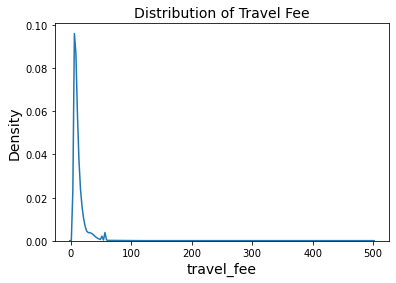

In [27]:
sb.kdeplot(train['travel_fee']).set_title("Distribution of Travel Fee")

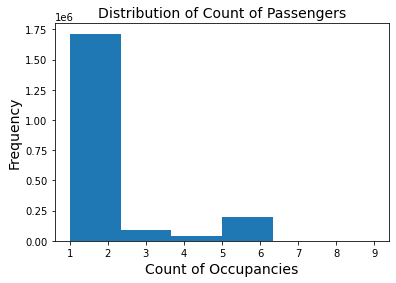

In [28]:
plt.hist(train['occupancy'], bins=6)
plt.xlabel('Count of Occupancies')
plt.ylabel('Frequency')
plt.title('Distribution of Count of Passengers')

plt.show()

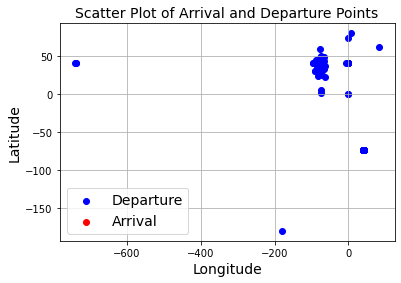

In [29]:
# Plot arrival points in blue
plt.scatter(train[train['occupancy'] == 1]['departure_long'],
            train[train['occupancy'] == 1]['departure_lat'],
            color='blue', label='Departure')

# Plot departure points in red
plt.scatter(train[train['occupancy'] == 0]['arrival_long'],
            train[train['occupancy'] == 0]['arrival_lat'],
            color='red', label='Arrival')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Arrival and Departure Points')
plt.legend()
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='arrival_long', ylabel='arrival_lat'>

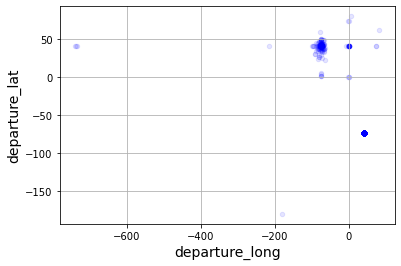

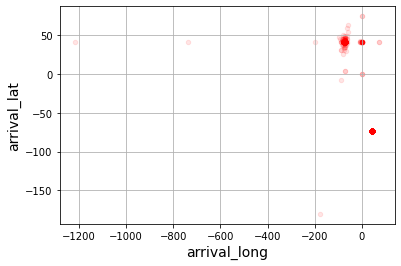

In [30]:
train.plot(kind="scatter", x="departure_long", y="departure_lat", grid=True, color='blue',alpha =0.1)
train.plot(kind="scatter", x="arrival_long", y="arrival_lat", grid=True, color='red',alpha =0.1)

In [31]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate and add Haversine distance column to the DataFrame
train['distance_km'] = haversine_distance(train['departure_lat'],
                                                     train['departure_long'],
                                                     train['arrival_lat'],
                                                     train['arrival_long'])

In [32]:
train['distance_km'].describe()

count    2.041760e+06
mean     3.626926e+00
std      3.419214e+01
min      0.000000e+00
25%      1.276033e+00
50%      2.192538e+00
75%      3.989618e+00
max      1.016583e+04
Name: distance_km, dtype: float64

In [33]:
train.head()

ID  travel_fee             departure_time  departure_long  departure_lat  arrival_long  arrival_lat  occupancy  distance_km
625101   2013-06-27 18:07:00.000000180         4.5  2013-06-27 18:07:00+00:00      -73.980940      40.759717    -73.976447    40.764835          2     0.683420
1336914   2013-07-27 08:55:00.00000037        16.5  2013-07-27 08:55:00+00:00      -73.973800      40.750710    -74.014455    40.703702          1     6.249678
2088427  2013-08-16 11:20:00.000000124         8.0  2013-08-16 11:20:00+00:00      -74.001810      40.740705    -73.987485    40.752102          1     1.749944
1612856    2013-04-23 22:42:30.0000003        14.0  2013-04-23 22:42:30+00:00      -73.993854      40.720611    -73.992844    40.760073          1     4.388799
1847080  2013-04-20 19:34:00.000000256         7.5  2013-04-20 19:34:00+00:00      -73.960283      40.690125    -73.987232    40.692187          1     2.283660

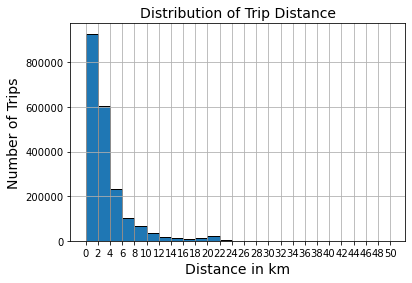

In [34]:
ax = train[train['distance_km']<50]['distance_km'].hist(bins = 25, edgecolor = 'black')
ax.set_title('Distribution of Trip Distance')
ax.set_xlabel('Distance in km')
ax.set_ylabel('Number of Trips')
ax.set_xticks(np.arange(0,51,2))

plt.show()

In [35]:
train['distance_km'].describe()

count    2.041760e+06
mean     3.626926e+00
std      3.419214e+01
min      0.000000e+00
25%      1.276033e+00
50%      2.192538e+00
75%      3.989618e+00
max      1.016583e+04
Name: distance_km, dtype: float64

In [36]:
# distances = []
# # Iterate through the dataset and calculate the distance for each ride
# for index, row in train.iterrows():
#     departure_lat = row['departure_lat']
#     departure_lon = row['departure_long']
#     arrival_lat = row['arrival_lat']
#     arrival_lon = row['arrival_long']
#     travel_fee = row['travel_fee']

#     # Calculate the distance for the current ride
#     distance_km = haversine_distance(departure_lat, departure_lon, arrival_lat, arrival_lon)
#     distances.append(distance_km)

# distance_fee_df = pd.DataFrame({'Distance_KM': distances, 'Travel_Fee': train['travel_fee']})

# # Sort the DataFrame based on the 'Distance_KM' column in descending order
# distance_fee_df = distance_fee_df.sort_values(by='Distance_KM', ascending=False)

# # Reset the index of the sorted DataFrame
# distance_fee_df = distance_fee_df.reset_index(drop=True)

# # Display the sorted DataFrame
# print(distance_fee_df)

Text(0.5, 1.0, 'Relationship between Distance and Fee')

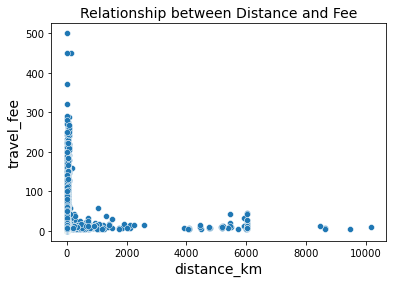

In [37]:
sb.scatterplot(x='distance_km', y='travel_fee', data=train)
plt.title('Relationship between Distance and Fee')

In [38]:
train['travel_fee'].describe()

count    2.041760e+06
mean     1.256495e+01
std      1.066204e+01
min      1.000000e-02
25%      6.500000e+00
50%      9.500000e+00
75%      1.400000e+01
max      5.000000e+02
Name: travel_fee, dtype: float64

In [39]:
### until now can found that the some of the distance is not make sence, max = 8000km++
### fee also mean = 12.54 but max is 450 which mean got outlier

In [40]:
train = train.loc[train['distance_km']<=100] ## try to set distance within 100km

In [41]:
train.describe()

travel_fee  departure_long  departure_lat  arrival_long   arrival_lat     occupancy   distance_km
count  2.041558e+06    2.041558e+06   2.041558e+06  2.041558e+06  2.041558e+06  2.041558e+06  2.041558e+06
mean   1.256468e+01   -7.361071e+01   4.038595e+01 -7.361007e+01  4.038638e+01  1.711039e+00  3.396691e+00
std    1.065723e+01    6.457775e+00   6.457204e+00  6.457792e+00  6.457228e+00  1.376743e+00  3.704495e+00
min    1.000000e-02   -1.800000e+02  -1.800000e+02 -1.800000e+02 -1.800000e+02  1.000000e+00  0.000000e+00
25%    6.500000e+00   -7.399236e+01   4.073568e+01 -7.399164e+01  4.073478e+01  1.000000e+00  1.275943e+00
50%    9.500000e+00   -7.398208e+01   4.075286e+01 -7.398063e+01  4.075339e+01  1.000000e+00  2.192345e+00
75%    1.400000e+01   -7.396787e+01   4.076737e+01 -7.396498e+01  4.076811e+01  2.000000e+00  3.988797e+00
max    5.000000e+02    7.393785e+01   4.878085e+01  7.393785e+01  4.878085e+01  9.000000e+00  9.912915e+01

In [42]:
corr_matrix = train.corr()
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
distance_km       0.887686
occupancy         0.012905
departure_long    0.006843
arrival_long      0.006128
arrival_lat      -0.005229
departure_lat    -0.005342
Name: travel_fee, dtype: float64

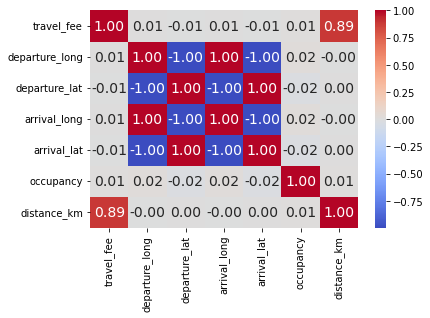

In [43]:
correlation_matrix = train.corr()
sb.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt=".2f")
plt.show()

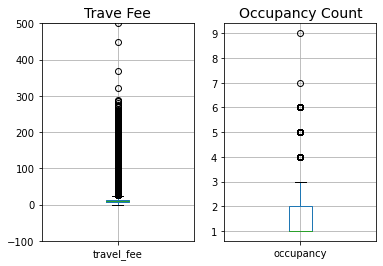

In [44]:
fig, ax = plt.subplots(1,2)

train.boxplot(column='travel_fee', ax=ax[0])
ax[0].set_title('Trave Fee')
ax[0].set_ylim(-100, 500)

train.boxplot(column='occupancy', ax=ax[1])
ax[1].set_title('Occupancy Count')

plt.show()

In [45]:
train = train.loc[train['travel_fee']<=300] ## try to set travel_fee within rm300

In [46]:
#train['fee_per_km'] = np.where(train['distance_km']<1,
#                                train['travel_fee'],
#                                train['travel_fee']/train['distance_km'])

In [47]:
#train['fee_per_km'].describe()

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041554 entries, 625101 to 2219110
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              object 
 1   travel_fee      float64
 2   departure_time  object 
 3   departure_long  float64
 4   departure_lat   float64
 5   arrival_long    float64
 6   arrival_lat     float64
 7   occupancy       int64  
 8   distance_km     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 155.8+ MB


In [49]:
corr_matrix = train.corr()
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
distance_km       0.888888
occupancy         0.012916
departure_long    0.006854
arrival_long      0.006137
arrival_lat      -0.005242
departure_lat    -0.005355
Name: travel_fee, dtype: float64

Text(0.5, 1.0, 'Relationship between Distance and Fare')

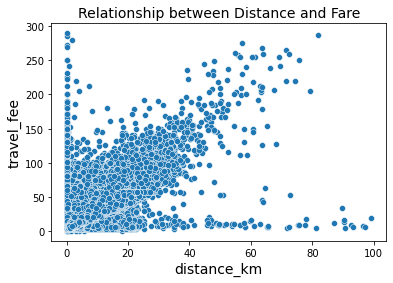

In [50]:
sb.scatterplot(x='distance_km', y='travel_fee', data=train)
plt.title('Relationship between Distance and Fare')

In [51]:
##### now looks nice, try to change the departure time to int like 1 is monday, 2 is tuesday.....

In [52]:
from datetime import datetime
train['departure_time'] = pd.to_datetime(train['departure_time']).dt.dayofweek + 1

train[["departure_time"]].describe()

departure_time
count    2.041554e+06
mean     4.038141e+00
std      1.956506e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00

In [53]:
dayofweek_mapping = {
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday',
    7:'Sunday'
}

#train['departure_day'] = train['departure_time'].replace(dayofweek_mapping)
train.head()

ID  travel_fee  departure_time  departure_long  departure_lat  arrival_long  arrival_lat  occupancy  distance_km
625101   2013-06-27 18:07:00.000000180         4.5               4      -73.980940      40.759717    -73.976447    40.764835          2     0.683420
1336914   2013-07-27 08:55:00.00000037        16.5               6      -73.973800      40.750710    -74.014455    40.703702          1     6.249678
2088427  2013-08-16 11:20:00.000000124         8.0               5      -74.001810      40.740705    -73.987485    40.752102          1     1.749944
1612856    2013-04-23 22:42:30.0000003        14.0               2      -73.993854      40.720611    -73.992844    40.760073          1     4.388799
1847080  2013-04-20 19:34:00.000000256         7.5               6      -73.960283      40.690125    -73.987232    40.692187          1     2.283660

In [54]:
corr_matrix = train.corr()
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
distance_km       0.888888
occupancy         0.012916
departure_long    0.006854
arrival_long      0.006137
departure_time   -0.000975
arrival_lat      -0.005242
departure_lat    -0.005355
Name: travel_fee, dtype: float64

In [55]:
train.isna().sum()  #check na value again

ID                0
travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      0
arrival_lat       0
occupancy         0
distance_km       0
dtype: int64

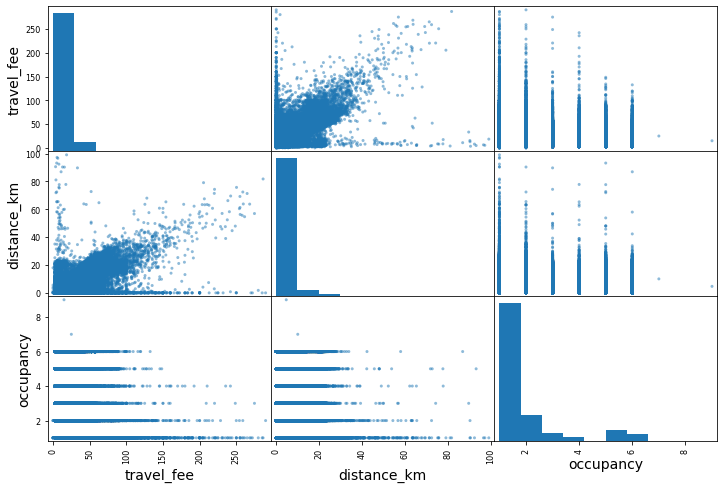

In [56]:
from pandas.plotting import scatter_matrix

num_attribs = ["travel_fee", "distance_km",
 "occupancy"]
scatter_matrix(train[num_attribs], figsize=(12, 8))
plt.show()

In [57]:
taxi = train.drop('travel_fee',axis=1)
taxi_fee = train['travel_fee'].copy()

In [58]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041554 entries, 625101 to 2219110
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              object 
 1   departure_time  int64  
 2   departure_long  float64
 3   departure_lat   float64
 4   arrival_long    float64
 5   arrival_lat     float64
 6   occupancy       int64  
 7   distance_km     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 140.2+ MB


In [59]:
#from sys import orig_argv
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


class HaversineDistanceTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        distances = haversine_distance(X['departure_lat'], X['departure_long'],
                                       X['arrival_lat'], X['arrival_long'])
        return np.c_[X, distances]

num_attrs = ['occupancy']
#num_attrs = ['occupancy']
numerical_features = ['departure_long', 'departure_lat', 'arrival_long', 
                   'arrival_lat','occupancy','distance_km']
cat_attrs = ['departure_time']

columns_to_drop = ['departure_long', 'departure_lat', 'arrival_long', 
                   'arrival_lat', 'fee_per_km', 'departure_day']


def remove_zero_rows(data, columns):
    return data[data[columns] != 0].dropna()

num_pipeline = make_pipeline(
    #FunctionTransformer(remove_zero_rows, kw_args={'columns': num_attrs}),
    SimpleImputer(strategy='mean'),
    #FunctionTransformer(np.log1p, validate=False),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)


distance_pipeline = make_pipeline(
    HaversineDistanceTransformer(),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, cat_attrs),
    ('distance', distance_pipeline,[])
])

In [60]:
taxi_prepared = preprocessing.fit_transform(taxi)

In [61]:
taxi_prepared

array([[-0.05733073,  0.05788449, -0.05673408, ...,  0.        ,
         0.        ,  0.        ],
       [-0.05622509,  0.05648961, -0.06261968, ...,  0.        ,
         1.        ,  0.        ],
       [-0.06056249,  0.05494018, -0.05844333, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.06062025,  0.0539955 , -0.06218285, ...,  0.        ,
         0.        ,  1.        ],
       [-0.05611777,  0.05655001, -0.05893065, ...,  0.        ,
         0.        ,  0.        ],
       [-0.05404167,  0.0600921 , -0.05587048, ...,  1.        ,
         0.        ,  0.        ]])

In [62]:
taxi.head()

ID  departure_time  departure_long  departure_lat  arrival_long  arrival_lat  occupancy  distance_km
625101   2013-06-27 18:07:00.000000180               4      -73.980940      40.759717    -73.976447    40.764835          2     0.683420
1336914   2013-07-27 08:55:00.00000037               6      -73.973800      40.750710    -74.014455    40.703702          1     6.249678
2088427  2013-08-16 11:20:00.000000124               5      -74.001810      40.740705    -73.987485    40.752102          1     1.749944
1612856    2013-04-23 22:42:30.0000003               2      -73.993854      40.720611    -73.992844    40.760073          1     4.388799
1847080  2013-04-20 19:34:00.000000256               6      -73.960283      40.690125    -73.987232    40.692187          1     2.283660

In [63]:
taxi_fee.head()

625101      4.5
1336914    16.5
2088427     8.0
1612856    14.0
1847080     7.5
Name: travel_fee, dtype: float64

**Linear Regession**

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(taxi, taxi_fee)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['departure_long',
                                                   'departure_lat',
                                                   'arrival_long',
                                                   'arrival_lat', 'occupancy',
                                                   'distance_km']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['departure_time']),
                                                 ('distance',
                                                  Pipeline(steps=[('haversinedistancetransformer',
                                                                   HaversineDistanceTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('linearregression', LinearRegression())])

In [65]:
taxi_predict = lin_reg.predict(taxi)
taxi_predict[:50000]

array([ 5.81292725, 20.5642395 ,  8.27792358, ...,  5.84143066,
        5.22512817,  6.70135498])

In [66]:
taxi_fee.iloc[:50000].values

array([ 4.5, 16.5,  8. , ...,  4. ,  3.5,  6. ])

In [67]:
err_ratios = taxi_predict[:50000] / taxi_fee.iloc[:50000].values -1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in err_ratios]))

29.2%, 24.6%, 3.5%, 4.6%, 28.7%, 11.3%, 0.2%, 14.2%, -0.4%, -24.1%, 16.7%, 44.4%, -5.1%, 22.5%, -2.8%, 10.0%, 17.2%, -50.4%, -65.9%, 2.2%, 19.5%, -3.4%, 2.7%, 34.9%, 41.1%, -93.4%, 17.6%, -17.1%, 29.3%, -0.3%, 34.1%, 19.4%, -6.3%, -5.3%, -8.0%, 25.6%, 30.1%, 26.1%, -7.5%, -9.9%, 0.3%, 42.9%, -13.6%, 9.1%, 46.3%, -19.5%, 21.0%, 9.0%, -35.6%, -14.6%, 3.9%, 4.2%, -18.1%, -15.7%, 3.6%, -7.4%, 7.8%, 27.5%, 36.0%, -2.4%, 53.1%, 12.0%, -5.9%, -15.0%, 31.5%, 25.3%, -56.0%, 22.2%, 10.1%, -17.1%, -1.6%, 41.4%, -14.5%, 12.2%, 11.8%, 15.2%, 29.3%, 18.4%, 14.4%, 52.6%, 18.5%, -27.0%, 9.8%, -43.9%, -1.7%, -5.6%, -34.5%, 33.6%, 24.3%, 32.3%, -30.7%, -11.8%, -2.5%, -1.6%, 48.8%, -22.5%, -30.3%, 23.4%, -17.0%, -8.9%, 32.5%, 6.6%, 1.5%, 4.7%, -43.8%, 7.0%, 47.7%, -21.5%, 14.2%, 49.1%, 5.1%, 27.3%, 26.0%, 16.0%, 18.2%, -20.4%, -23.1%, 17.3%, -10.6%, 4.2%, 17.0%, 15.9%, -5.6%, -16.9%, -7.2%, -8.9%, 18.5%, 33.7%, 21.2%, 7.2%, -4.9%, 10.8%, 27.4%, 32.3%, 14.6%, -6.2%, 19.4%, 27.1%, -20.6%, 41.6%, 64.9%, 0.1

In [68]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(taxi_fee,
                              taxi_predict,
                              squared=False) #squared : If True returns MSE value, if Fals
lin_rmse

4.831948959150344

In [69]:
## cross_validation
from sklearn.model_selection import cross_val_score
lin_rmse_CV = -cross_val_score(lin_reg,
                               taxi, taxi_fee,
                               scoring = "neg_root_mean_squared_error",
                               cv = 10)

print("Cross Validation RMSE___")
pd.Series(lin_rmse_CV).describe()

Cross Validation RMSE___


count    10.000000
mean      4.831618
std       0.069172
min       4.765225
25%       4.784923
50%       4.814107
75%       4.833325
max       4.985548
dtype: float64

In [70]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(taxi_fee,
                              taxi_predict)
lin_mae

2.4099268332411685

In [71]:
## cross_validation
from sklearn.model_selection import cross_val_score
lin_mae_CV = -cross_val_score(lin_reg,
                               taxi, taxi_fee,
                               scoring = "neg_mean_absolute_error",
                               cv = 10)

print("Cross Validation MAE___")
pd.Series(lin_mae_CV).describe()

Cross Validation MAE___


count    10.000000
mean      2.409966
std       0.006771
min       2.402301
25%       2.404440
50%       2.409254
75%       2.413752
max       2.424359
dtype: float64

In [72]:
lin_reg.fit(taxi, taxi_fee)
fare_predictions = lin_reg.predict(taxi)

pd.DataFrame(fare_predictions, columns = ['taxi_predictions'])

taxi_predictions
0                5.812927
1               20.564240
2                8.277924
3               14.639374
4                9.651001
...                   ...
2041549          7.493835
2041550          6.137634
2041551          6.259888
2041552         10.248444
2041553          8.927429

[2041554 rows x 1 columns]

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


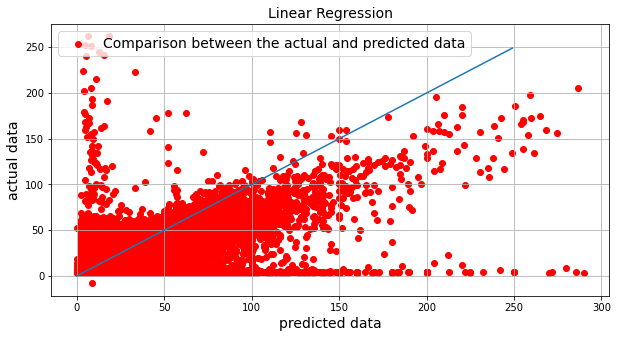

In [73]:
plt.figure(figsize=(10,5))
plt.scatter(taxi_fee,fare_predictions, color="red",label="Comparison between the actual and predicted data")
plt.legend()
plt.grid()
plt.plot(range(250), range(250))
plt.title("Linear Regression")
plt.xlabel("predicted data")
plt.ylabel("actual data")
plt.show()

In [74]:
taxi_predict_series = pd.Series(taxi_predict)
description = taxi_predict_series.describe()

# Format the statistics with five decimal places
taxi_pred = description.apply(lambda x: '{:.5f}'.format(x))
taxi_pred

count    2041554.00000
mean          12.56389
std            9.48206
min           -8.19305
25%            7.16330
50%            9.49229
75%           14.05157
max          261.93176
dtype: object

In [75]:
from sklearn.pipeline import Pipeline

lin_reg_full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('linear_regression', LinearRegression()),
])

lin_reg_full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['departure_long',
                                                   'departure_lat',
                                                   'arrival_long',
                                                   'arrival_lat', 'occupancy',
                                                   'distance_km']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['departure_time']),
                                                 ('distance',
                                                  Pipeline(steps=[('haversinedistancetransformer',
                                                                   HaversineDistanceTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('linear_regression', LinearRegression())])

In [76]:
lin_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'linearregression', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__num', 'columntransformer__cat', 'columntransformer__distance', 'columntransformer__num__memory', 'columntransformer__num__steps', 'columntransformer__num__verbose', 'columntransformer__num__simpleimputer', 'columntransformer__num__standardscaler', 'columntransformer__num__simpleimputer__add_indicator', 'columntransformer__num__simpleimputer__copy', 'columntransformer__num__simpleimputer__fill_value', 'columntransformer__num__simpleimputer__missing_values', 'columntransformer__num__simpleimputer__strategy', 'columntransformer__num__simpleimputer__verbose', 'columntransformer__num__standardscaler__copy', 'columntransformer__num__standardscaler__with_mean', 'columntransformer__num__sta

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'preprocessing__num__simpleimputer__strategy': ['mean', 'median'],
    'preprocessing__num__standardscaler__with_mean': [True, False],
    'preprocessing__num__standardscaler__with_std': [True, False],
    'preprocessing__cat__simpleimputer__strategy': ['most_frequent', 'constant'],
    'preprocessing__cat__onehotencoder__handle_unknown': ['ignore', 'error'],
    'linear_regression__normalize': [True, False],  # Example hyperparameter for LinearRegression
}

grid_search = GridSearchCV(lin_reg_full_pipeline, param_grid,
                           cv=5, scoring='neg_root_mean_squared_error')

grid_search.fit(taxi, taxi_fee)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['departure_long',
                                                                          'departure_lat',
                                                                          'arrival_long',
                                                                          'arrival_lat',
                                                                          'occupancy',
                                                                          'distance_km']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_fr...
                         'preprocessing__cat__onehotencoder__handle_unknown': ['ignore',
                                                                               'error'],
                         'preprocessing__cat__simpleimputer__strategy': ['most_frequent',
                                                                         'constant'],
                         'preprocessing__num__simpleimputer__strategy': ['mean',
                                                                         'median'],
                         'preprocessing__num__standardscaler__with_mean': [True,
                                                                           False],
                         'preprocessing__num__standardscaler__with_std': [True,
                                                                          False]},
             scoring='neg_root_mean_squared_error')

In [78]:
grid_search.best_params_

{'linear_regression__normalize': False,
 'preprocessing__cat__onehotencoder__handle_unknown': 'ignore',
 'preprocessing__cat__simpleimputer__strategy': 'most_frequent',
 'preprocessing__num__simpleimputer__strategy': 'mean',
 'preprocessing__num__standardscaler__with_mean': True,
 'preprocessing__num__standardscaler__with_std': False}

In [79]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by='mean_test_score',ascending=False, inplace=True)

cv_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_linear_regression__normalize param_preprocessing__cat__onehotencoder__handle_unknown param_preprocessing__cat__simpleimputer__strategy param_preprocessing__num__simpleimputer__strategy param_preprocessing__num__standardscaler__with_mean param_preprocessing__num__standardscaler__with_std                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
33       1.539036      0.017486         0.132200        0.005565                              False                                             ignore                                          most_frequent                                              mean                                               True                                               False  {'linear_regression__normalize': False, 'prepr...          -4.797835          -4.849626          -4.781835          -4.819429          -4.911174         -4.83198        0.045653                1
61       3.126412      0.025332         0.124970        0.007693                              False                                              error                                               constant                                            median                                               True                                               False  {'linear_regression__normalize': False, 'prepr...          -4.797835          -4.849626          -4.781835          -4.819429          -4.911174         -4.83198        0.045653                1
37       3.272680      0.104724         0.137600        0.008546                              False                                             ignore                                          most_frequent                                            median                                               True                                               False  {'linear_regression__normalize': False, 'prepr...          -4.797835          -4.849626          -4.781835          -4.819429          -4.911174         -4.83198        0.045653                1
41       1.469417      0.015452         0.131401        0.005004                              False                                             ignore                                               constant                                              mean                                               True                                               False  {'linear_regression__normalize': False, 'prepr...          -4.797835          -4.849626          -4.781835          -4.819429          -4.911174         -4.83198        0.045653                1
57       1.483261      0.010564         0.130199        0.003655                              False                                              error                                               constant                                              mean                                               True                                               False  {'linear_regression__normalize': False, 'prepr...          -4.797835          -4.849626          -4.781835          -4.819429          -4.911174         -4.83198        0.045653                1

In [80]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'preprocessing__num__simpleimputer__strategy': ['mean', 'median'],
    'preprocessing__num__standardscaler__with_mean': [True, False],
    'preprocessing__num__standardscaler__with_std': [True, False],
    'preprocessing__cat__simpleimputer__strategy': ['most_frequent', 'constant'],
    'preprocessing__cat__onehotencoder__handle_unknown': ['ignore', 'error'],
    'linear_regression__normalize': [True, False], 
}

random_search = RandomizedSearchCV(
    lin_reg_full_pipeline, param_distributions=param_dist, n_iter=5, cv=5, 
    scoring='neg_mean_squared_error', random_state=42, n_jobs=-1
)

random_search.fit(taxi, taxi_fee)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['departure_long',
                                                                                'departure_lat',
                                                                                'arrival_long',
                                                                                'arrival_lat',
                                                                                'occupancy',
                                                                                'distance_km']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='m...
                                        'preprocessing__cat__onehotencoder__handle_unknown': ['ignore',
                                                                                              'error'],
                                        'preprocessing__cat__simpleimputer__strategy': ['most_frequent',
                                                                                        'constant'],
                                        'preprocessing__num__simpleimputer__strategy': ['mean',
                                                                                        'median'],
                                        'preprocessing__num__standardscaler__with_mean': [True,
                                                                                          False],
                                        'preprocessing__num__standardscaler__with_std': [True,
                                                                                         False]},
                   random_state=42, scoring='neg_mean_squared_error')

In [81]:
random_search.best_params_

{'preprocessing__num__standardscaler__with_std': True,
 'preprocessing__num__standardscaler__with_mean': False,
 'preprocessing__num__simpleimputer__strategy': 'mean',
 'preprocessing__cat__simpleimputer__strategy': 'constant',
 'preprocessing__cat__onehotencoder__handle_unknown': 'error',
 'linear_regression__normalize': False}

In [82]:
# choose random-search is because dataset is huge
best_estimator = random_search.best_estimator_
print("Best Estimator:", best_estimator)

Best Estimator: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['departure_long',
                                                   'departure_lat',
                                                   'arrival_long',
                                                   'arrival_lat', 'occupancy',
                                                   'distance_km']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                            

In [83]:
lin_reg_final = random_search.best_estimator_
linear_regression_estimator = lin_reg_final.named_steps['linear_regression']

# Get the coefficients
coefficients = linear_regression_estimator.coef_

# Printing the coefficients for each feature
for feature, coef in zip(taxi.columns, coefficients):
    print(f"{feature}: {coef:.3f}")

ID: 63.430
departure_time: 85.525
departure_long: -63.128
departure_lat: -85.320
arrival_long: 0.025
arrival_lat: 9.462
occupancy: -0.101
distance_km: 0.087


In [84]:
test.loc[:, 'distance_km'] = haversine_distance(test['departure_lat'],
                                                test['departure_long'],
                                                test['arrival_lat'], 
                                                test['arrival_long']
)
from datetime import datetime
test['departure_time'] = pd.to_datetime(test['departure_time']).dt.dayofweek + 1

test[["departure_time"]].describe()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\User\AppData\Local\Temp/ipykernel_21364/3946915126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['departure_time'] = pd.to_datetime(test['departure_time']).dt.dayofweek + 1


departure_time
count   519312.000000
mean         4.037159
std          1.956672
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000

In [85]:
test.describe()

travel_fee  departure_time  departure_long  departure_lat   arrival_long    arrival_lat      occupancy    distance_km
count  519312.000000   519312.000000   519312.000000  519312.000000  519304.000000  519304.000000  519312.000000  519304.000000
mean       12.582956        4.037159      -72.425686      39.740534     -72.377657      39.715643       1.709177      18.037906
std        10.784557        1.956672       11.257025       8.150004      11.627005       8.210000       1.375300     352.498898
min       -27.500000        1.000000     -124.500000     -74.017277    -736.050000     -74.186632       0.000000       0.000000
25%         6.500000        2.000000      -73.992225      40.734367     -73.991472      40.733519       1.000000       1.240087
50%         9.500000        4.000000      -73.981887      40.752363     -73.980208      40.752802       1.000000       2.160158
75%        14.000000        6.000000      -73.966817      40.767048     -73.963640      40.767834       2.000000       3.956044
max       358.210000        7.000000       40.851067      73.996983    1428.740223      73.972283       9.000000   10764.927377

In [86]:
X_test = test.drop('travel_fee', axis=1)
y_test = test['travel_fee'].copy()

X_test_preprocessed = preprocessing.fit(X_test)

In [87]:

final_predictions = lin_reg_final.predict(X_test)

lin_reg_final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
lin_reg_final_rmse

898.1826346653203

In [88]:
train_predictions = lin_reg_final.predict(taxi)
lin_reg_train_rmse = mean_squared_error(taxi_fee, train_predictions, squared=False)
lin_reg_train_rmse

4.831948938866701

In [89]:
data_2 = load_data()

In [90]:
data_2.loc[:, 'distance_km'] = haversine_distance(data_2['departure_lat'],
                                                data_2['departure_long'],
                                                data_2['arrival_lat'], 
                                                data_2['arrival_long']
)
from datetime import datetime
data_2['departure_time'] = pd.to_datetime(data_2['departure_time']).dt.dayofweek + 1

data_2[["departure_time"]].describe()

departure_time
count    2.596558e+06
mean     4.037701e+00
std      1.956292e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00

In [91]:
X_data = data_2.drop('travel_fee', axis=1)
y_data = data_2['travel_fee'].copy()

final_pred = lin_reg_final.predict(X_data)

lin_reg_fullset_final_rmse = mean_squared_error(y_data, final_pred, squared=False)
lin_reg_fullset_final_rmse

906.6289248449577